# Home LLC Submission

Importing Necessary Libraries for Manipulating Data

In [1]:
import pandas as pd
import numpy as np

# Importing the Given Data set

This Dataset contains House price index for the past years

In [2]:
HPI=pd.read_csv("C:\\Users\\inasu\\Downloads\\CSUSHPISA.csv")
HPI.head()

,DATE,CSUSHPISA
0,1/1/1987,63.965
1,2/1/1987,64.425
2,3/1/1987,64.736
3,4/1/1987,65.135
4,5/1/1987,65.569


As we have to find which factors impacted home prices over the last 20 years, so we remove the data before that

In [3]:
HPI=HPI[pd.DatetimeIndex(HPI['DATE']).year>=2000].reset_index(drop=True)
HPI.rename(columns={"DATE":"Date","CSUSHPISA": "HPI"}, inplace = True)
HPI.head()

,Date,HPI
0,1/1/2000,100.552
1,2/1/2000,101.339
2,3/1/2000,102.127
3,4/1/2000,102.922
4,5/1/2000,103.677


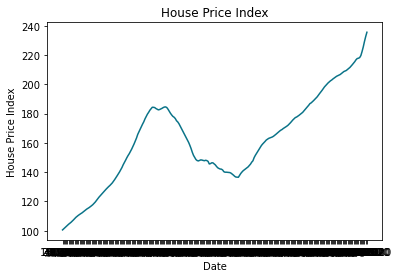

In [4]:
import matplotlib.pyplot as plt

def plot_basic(df, title='House Price Index', y_label='House Price Index', x_label='Date'):
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Date'], df['HPI'], '#0A7388')

    # Add title and labels
    ax.set_title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()
    
plot_basic(HPI)

# Income

Wages Dataset contains the Average income of households in US

In [5]:
Wages=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\Average_Household_Income.csv")
Wages.head()

,Year,Average_Household_Income
0,1990,54621
1,1991,53025
2,1992,52615
3,1993,52334
4,1994,52942


In [6]:
Wages=Wages[Wages['Year']>=2000].reset_index(drop=True)
Wages.head()

,Year,Average_Household_Income
0,2000,59938
1,2001,58609
2,2002,57947
3,2003,57875
4,2004,57674


In [7]:
Wages=Wages.merge(HPI.groupby(pd.DatetimeIndex(HPI['Date']).year).mean(), left_on='Year', right_on='Date')
Wages.head()

,Year,Average_Household_Income,HPI
0,2000,59938,104.767917
1,2001,58609,113.178500
2,2002,57947,122.278250
3,2003,57875,133.730833
4,2004,57674,150.439250


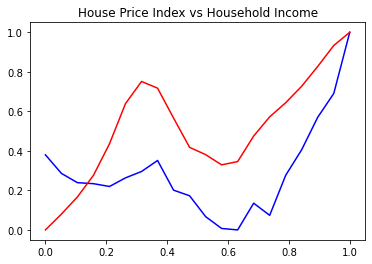

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def plot_basic(df, title='House Price Index vs Household Income'):
    #Fitting both the values on same scale for comparasion
    scaler.fit(df)
    df=pd.DataFrame(scaler.transform(df),columns=["Year","Salary","HPI"])
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Year'], df["Salary"], 'blue')
    ax.plot(df['Year'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(Wages)

In [9]:
Wages.corr()

,Year,Average_Household_Income,HPI
Year,1.000000,0.394820,0.755706
Average_Household_Income,0.394820,1.000000,0.610276
HPI,0.755706,0.610276,1.000000


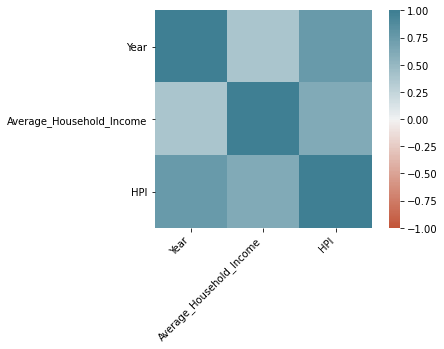

In [10]:
import seaborn as sns

ax = sns.heatmap(
    Wages.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can say that Household income is an important factor to decide house prices

# Unemployment and Underemployment

## Unemployment

Unemployment Dataset contains the info about unemployed people in the US

In [11]:
Unemployment=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\Unemployment_rate.csv")
Unemployment.head()

,Date,Young workers,All workers,Recent graduates,College graduates
0,1/1/1990,7.6,5.1,3.4,2.3
1,2/1/1990,7.6,5.1,3.0,2.2
2,3/1/1990,7.6,5.1,3.1,2.2
3,4/1/1990,7.7,5.1,3.6,2.2
4,5/1/1990,7.7,5.1,3.9,2.2


In [12]:
Unemployment=Unemployment.merge(HPI, left_on='Date', right_on='Date')
Unemployment=Unemployment[:-6] #Removing the 2020 Data as there was a sudden rise in Unemployment
Unemployment.tail()

,Date,Young workers,All workers,Recent graduates,College graduates,HPI
235,8/1/2019,6.2,3.5,4.2,2.2,210.186
236,9/1/2019,6.4,3.5,4.1,2.2,210.879
237,10/1/2019,6.5,3.5,3.7,2.2,211.593
238,11/1/2019,6.6,3.5,3.5,2.1,212.509
239,12/1/2019,6.6,3.6,3.7,2.1,213.501


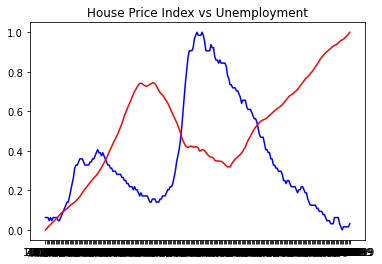

In [13]:
def plot_basic(df, title='House Price Index vs Unemployment'):
    #Fitting both the values on same scale for comparasion
    scaler.fit(df[["All workers","HPI"]])
    df[["All workers","HPI"]]=pd.DataFrame(scaler.transform(df[["All workers","HPI"]]),columns=["Unemployment","HPI"])
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Date'], df["All workers"], 'blue')
    ax.plot(df['Date'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(Unemployment)

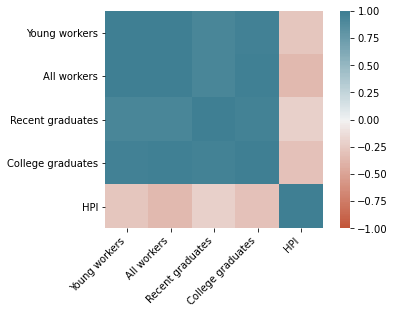

In [14]:
ax = sns.heatmap(
    Unemployment.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
Unemployment.corr()

,Young workers,All workers,Recent graduates,College graduates,HPI
Young workers,1.000000,0.984811,0.933539,0.970113,-0.278427
All workers,0.984811,1.000000,0.929931,0.982783,-0.365905
Recent graduates,0.933539,0.929931,1.000000,0.957792,-0.215279
College graduates,0.970113,0.982783,0.957792,1.000000,-0.307236
HPI,-0.278427,-0.365905,-0.215279,-0.307236,1.000000


We can conclude from the above observation, Unemployment is a predictor of house prices but not a strong one

## Underemployment

Underemployemnt Dataset contains the info about Underemployemnt people in the US

In [16]:
underemployment=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\under_employment_college_grads.csv")
underemployment.head()

,Date,Recent graduates,College graduates
0,1/1/1990,42.9,34.1
1,2/1/1990,43.2,34.1
2,3/1/1990,43.3,34.1
3,4/1/1990,44.5,34.2
4,5/1/1990,44.8,34.3


In [17]:
underemployment=underemployment.merge(HPI, left_on='Date', right_on='Date')
underemployment=underemployment[:-6] #Removing the 2020 Data as there was a sudden rise in Unemployment
underemployment.tail()

,Date,Recent graduates,College graduates,HPI
235,8/1/2019,40.5,33.8,210.186
236,9/1/2019,41.4,33.8,210.879
237,10/1/2019,41.9,33.7,211.593
238,11/1/2019,42.1,33.5,212.509
239,12/1/2019,41.0,33.2,213.501


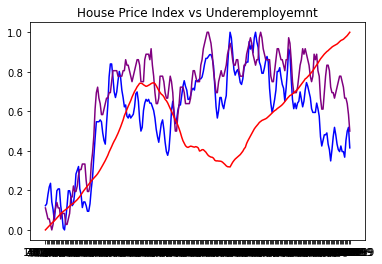

In [18]:
def plot_basic(df, title='House Price Index vs Underemployemnt'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df[["Recent graduates","College graduates","HPI"]])
    df[["Recent graduates","College graduates","HPI"]]=pd.DataFrame(scaler.transform(df[["Recent graduates","College graduates","HPI"]]))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Date'], df["Recent graduates"], 'blue')
    ax.plot(df['Date'], df["College graduates"], 'purple')
    ax.plot(df['Date'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(underemployment)

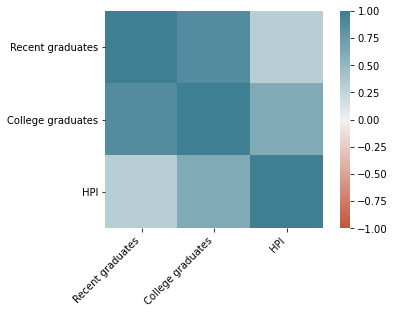

In [19]:
ax = sns.heatmap(
    underemployment.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
underemployment.corr()

,Recent graduates,College graduates,HPI
Recent graduates,1.000000,0.881063,0.319809
College graduates,0.881063,1.000000,0.614911
HPI,0.319809,0.614911,1.000000


from our observations we can conclude Underemployment is also not a very strong predictor for House Price Index, but is weakly related

# Tax and Intrest Rates

## Tax

In [21]:
tax=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\tax_over_years.csv")
tax.head()

,Year,Bottom Bracket Rate %,Bottom Bracket Taxable Income up to,Top Bracket Rate %,Top Bracket Taxable Income Over
0,2020,10,19400,37,622050
1,2019,10,19400,37,612350
2,2018,10,19050,37,600000
3,2017,10,18650,39.6,470700
4,2016,10,18550,39.6,466950


In [22]:
tax['Year']=tax['Year'].astype('int')
tax['Bottom Bracket Rate %']=tax['Bottom Bracket Rate %'].astype('float')
tax['Top Bracket Rate %']=tax['Top Bracket Rate %'].astype('float')
tax=tax.merge(HPI.groupby(pd.DatetimeIndex(HPI['Date']).year).mean(), left_on='Year', right_on='Date')
tax.head()

,Year,Bottom Bracket Rate %,Bottom Bracket Taxable Income up to,Top Bracket Rate %,Top Bracket Taxable Income Over,HPI
0,2020,10.0,19400,37.0,622050,222.169417
1,2019,10.0,19400,37.0,612350,209.560250
2,2018,10.0,19050,37.0,600000,202.538417
3,2017,10.0,18650,39.6,470700,191.445583
4,2016,10.0,18550,39.6,466950,180.959500


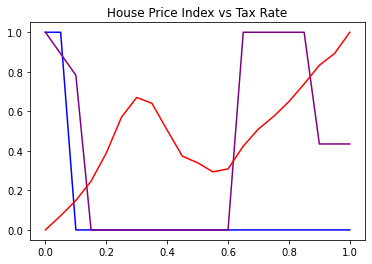

In [23]:
def plot_basic(df, title='House Price Index vs Tax Rate'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df[['Year',"Bottom Bracket Rate %",'Top Bracket Rate %','HPI']])
    df[['Year',"Bottom Bracket Rate %",'Top Bracket Rate %','HPI']]=pd.DataFrame(scaler.transform(df[['Year',"Bottom Bracket Rate %",'Top Bracket Rate %','HPI']]))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Year'], df["Bottom Bracket Rate %"], 'blue')
    ax.plot(df['Year'], df["Top Bracket Rate %"], 'purple')
    ax.plot(df['Year'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(tax)

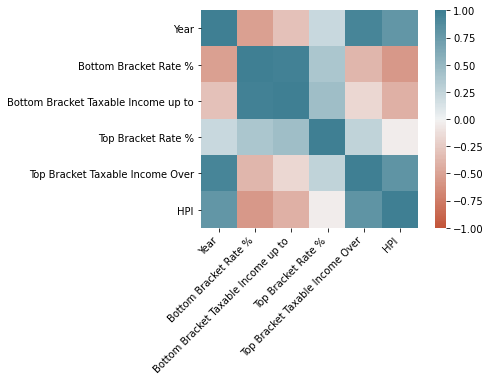

In [24]:
ax = sns.heatmap(
    tax.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
tax.corr()

,Year,Bottom Bracket Rate %,Bottom Bracket Taxable Income up to,Top Bracket Rate %,Top Bracket Taxable Income Over,HPI
Year,1.000000,-0.509010,-0.301853,0.220744,0.938326,0.793251
Bottom Bracket Rate %,-0.509010,1.000000,0.972844,0.378802,-0.367348,-0.562446
Bottom Bracket Taxable Income up to,-0.301853,0.972844,1.000000,0.459756,-0.170391,-0.419542
Top Bracket Rate %,0.220744,0.378802,0.459756,1.000000,0.259835,-0.037384
Top Bracket Taxable Income Over,0.938326,-0.367348,-0.170391,0.259835,1.000000,0.812263
HPI,0.793251,-0.562446,-0.419542,-0.037384,0.812263,1.000000


We can say that Tax rates are a good predictor for House Price Index

## Intrest

In [26]:
intrest=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\intrest.csv")
intrest.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [27]:
intrest["Date"]=pd.to_datetime(intrest[["Year", "Month", "Day"]])
HPI["Date"]=pd.to_datetime(HPI["Date"])
intrest.drop(["Year","Month","Day"],axis=1,inplace=True)
intrest=intrest.merge(HPI, left_on='Date', right_on='Date')
intrest.head()

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date,HPI
0,5.50,NaN,NaN,5.45,1.2,4.0,2.0,2000-01-01,100.552
1,5.50,NaN,NaN,5.73,NaN,4.1,2.2,2000-02-01,101.339
2,5.75,NaN,NaN,5.85,NaN,4.0,2.4,2000-03-01,102.127
3,6.00,NaN,NaN,6.02,7.8,3.8,2.3,2000-04-01,102.922
4,6.00,NaN,NaN,6.27,NaN,4.0,2.4,2000-05-01,103.677


In [28]:
intrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Federal Funds Target Rate     108 non-null    float64       
 1   Federal Funds Upper Target    99 non-null     float64       
 2   Federal Funds Lower Target    99 non-null     float64       
 3   Effective Federal Funds Rate  206 non-null    float64       
 4   Real GDP (Percent Change)     68 non-null     float64       
 5   Unemployment Rate             206 non-null    float64       
 6   Inflation Rate                206 non-null    float64       
 7   Date                          207 non-null    datetime64[ns]
 8   HPI                           207 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 16.2 KB


In [29]:
intrest.isna().sum()

Federal Funds Target Rate        99
Federal Funds Upper Target      108
Federal Funds Lower Target      108
Effective Federal Funds Rate      1
Real GDP (Percent Change)       139
Unemployment Rate                 1
Inflation Rate                    1
Date                              0
HPI                               0
dtype: int64

In [30]:
intrest.drop(["Real GDP (Percent Change)","Federal Funds Lower Target","Federal Funds Upper Target","Federal Funds Target Rate"],axis=1,inplace=True)
intrest.head()

,Effective Federal Funds Rate,Unemployment Rate,Inflation Rate,Date,HPI
0,5.45,4.0,2.0,2000-01-01,100.552
1,5.73,4.1,2.2,2000-02-01,101.339
2,5.85,4.0,2.4,2000-03-01,102.127
3,6.02,3.8,2.3,2000-04-01,102.922
4,6.27,4.0,2.4,2000-05-01,103.677


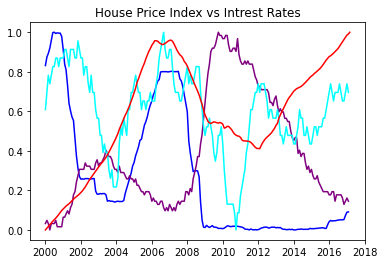

In [31]:
def plot_basic(df, title='House Price Index vs Intrest Rates'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df[['Effective Federal Funds Rate',"Unemployment Rate",'Inflation Rate','HPI']])
    df[['Effective Federal Funds Rate',"Unemployment Rate",'Inflation Rate','HPI']]=pd.DataFrame(scaler.transform(df[['Effective Federal Funds Rate',"Unemployment Rate",'Inflation Rate','HPI']]))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Date'], df["Effective Federal Funds Rate"], 'blue')
    ax.plot(df['Date'], df["Unemployment Rate"], 'purple')
    ax.plot(df['Date'], df["Inflation Rate"], 'cyan')
    ax.plot(df['Date'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(intrest)

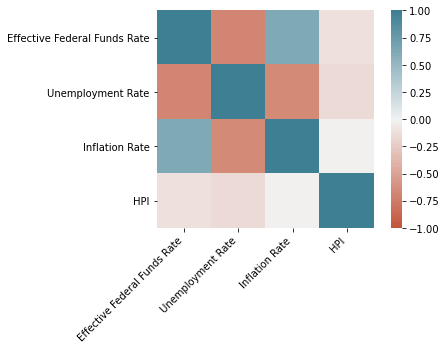

In [32]:
ax = sns.heatmap(
    intrest.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [33]:
intrest.corr()

,Effective Federal Funds Rate,Unemployment Rate,Inflation Rate,HPI
Effective Federal Funds Rate,1.000000,-0.685138,0.623951,-0.114527
Unemployment Rate,-0.685138,1.000000,-0.649710,-0.150175
Inflation Rate,0.623951,-0.649710,1.000000,-0.008672
HPI,-0.114527,-0.150175,-0.008672,1.000000


We can conclude from our above observations that Inflation Rate, Unemployment Rate and Effective Federal Funds Rate are all not so good predictors for House Price Index

# Median Sale Price and Monthly Supply

In [34]:
Median_Sale_Price=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\MSPUS.csv")
Median_Sale_Price.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [35]:
Monthly_Supply=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\MSACSR.csv")
Monthly_Supply.head()

,DATE,MSACSR
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


In [36]:
Median_Sale_Price=Median_Sale_Price.merge(Monthly_Supply, left_on='DATE', right_on='DATE')
Median_Sale_Price.head()

,DATE,MSPUS,MSACSR
0,1963-01-01,17800.0,4.7
1,1963-04-01,18000.0,5.3
2,1963-07-01,17900.0,4.6
3,1963-10-01,18500.0,5.9
4,1964-01-01,18500.0,5.8


In [37]:
Median_Sale_Price["DATE"]=pd.to_datetime(Median_Sale_Price["DATE"])
Median_Sale_Price=Median_Sale_Price.merge(HPI, left_on='DATE', right_on='Date').drop("Date",axis=1)
Median_Sale_Price.head()

,DATE,MSPUS,MSACSR,HPI
0,2000-01-01,165300.0,4.3,100.552
1,2000-04-01,163200.0,4.4,102.922
2,2000-07-01,168800.0,4.1,105.053
3,2000-10-01,172900.0,4.0,107.380
4,2001-01-01,169800.0,3.8,109.846


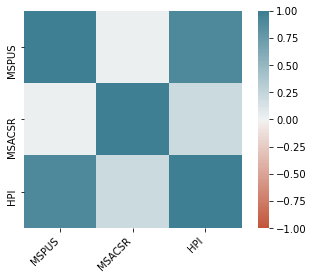

In [38]:
ax = sns.heatmap(
    Median_Sale_Price.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [39]:
Median_Sale_Price.corr()

,MSPUS,MSACSR,HPI
MSPUS,1.000000,0.029014,0.899287
MSACSR,0.029014,1.000000,0.196611
HPI,0.899287,0.196611,1.000000


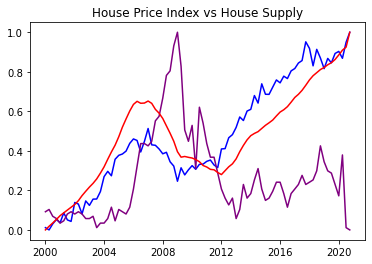

In [40]:
def plot_basic(df, title='House Price Index vs House Supply'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df[['MSPUS',"MSACSR",'HPI']])
    df[['MSPUS',"MSACSR",'HPI']]=pd.DataFrame(scaler.transform(df[['MSPUS',"MSACSR",'HPI']]))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['DATE'], df["MSPUS"], 'blue')
    ax.plot(df['DATE'], df["MSACSR"], 'purple')
    ax.plot(df['DATE'], df["HPI"], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(Median_Sale_Price)

From the above data we can conclude that House Supply in the market also hasnt been a good predictor for HPI in the past 20 years

# GDP

In [41]:
GDP=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\GDP.csv")
GDP.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [42]:
GDP=GDP[GDP["Country Code"]=='USA'].drop(["Country ","Country Code"],axis=1).T
GDP["Year"]=GDP.index.astype(int)
GDP["GDP"]=GDP[245]
GDP=GDP.drop(245,axis=1).reset_index(drop=True)

In [43]:
GDP.head()

,Year,GDP
0,1990,23888.60001
1,1991,24342.25890
2,1992,25418.99078
3,1993,26387.29373
4,1994,27694.85342


In [44]:
GDP=GDP.merge(HPI.groupby(pd.DatetimeIndex(HPI['Date']).year).mean(), left_on='Year', right_on='Date')
GDP.head()

,Year,GDP,HPI
0,2000,36334.90878,104.767917
1,2001,37133.24281,113.178500
2,2002,38023.16111,122.278250
3,2003,39496.48588,133.730833
4,2004,41712.80107,150.439250


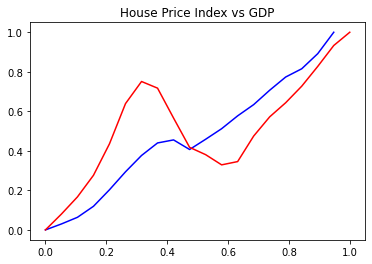

In [45]:
def plot_basic(df, title='House Price Index vs GDP'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df)
    df=pd.DataFrame(scaler.transform(df))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df[0], df[1], 'blue')
    ax.plot(df[0], df[2], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(GDP)

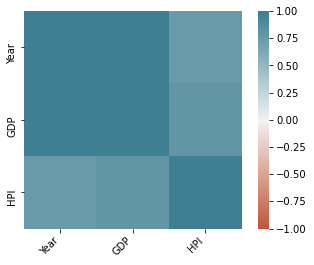

In [46]:
ax = sns.heatmap(
    GDP.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [47]:
GDP.corr()

,Year,GDP,HPI
Year,1.000000,0.988828,0.755706
GDP,0.988828,1.000000,0.792639
HPI,0.755706,0.792639,1.000000


We can say that GDP is an inportant factor in deciding the House Prices

# Bank Failure

In [48]:
banks=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\banks.csv")
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [49]:
banks.drop(['Headquarters','Financial Institution Number','Institution Name','Institution Type','Charter Type','Insurance Fund','Certificate Number','Transaction Type'],axis=1,inplace=True)

In [50]:
banks.isna().sum()

Failure Date               0
Total Deposits             0
Total Assets             151
Estimated Loss (2015)    975
dtype: int64

In [51]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Failure Date           3484 non-null   object 
 1   Total Deposits         3484 non-null   int64  
 2   Total Assets           3333 non-null   float64
 3   Estimated Loss (2015)  2509 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 109.0+ KB


In [52]:
banks=banks.groupby(pd.DatetimeIndex(banks['Failure Date']).year).sum().astype('int')
banks.head()

,Total Deposits,Total Assets,Estimated Loss (2015)
Failure Date,,,
1934,1966,2661,0
1935,13377,12324,0
1936,27762,12927,0
1937,32804,19284,0
1938,62064,13919,0


In [53]:
banks['Failure Date']=banks.index
banks=banks.reset_index(drop=True)
banks.head()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Date
0,1966,2661,0,1934
1,13377,12324,0,1935
2,27762,12927,0,1936
3,32804,19284,0,1937
4,62064,13919,0,1938


In [54]:
banks=banks.merge(HPI.groupby(pd.DatetimeIndex(HPI['Date']).year).mean(), left_on='Failure Date', right_on='Date')
banks.head()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Date,HPI
0,342584,410160,32538,2000,104.767917
1,1661214,1821760,292465,2001,113.178500
2,2512834,2872720,415314,2002,122.278250
3,901978,947317,62646,2003,133.730833
4,156733,170099,3917,2004,150.439250


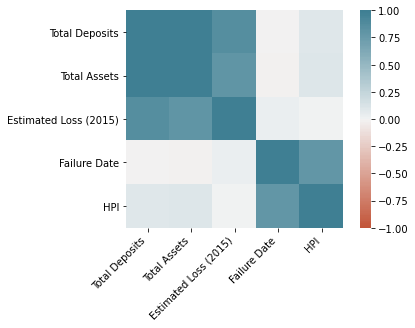

In [55]:
ax = sns.heatmap(
    banks.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
banks.corr()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Date,HPI
Total Deposits,1.000000,0.992116,0.866932,-0.002469,0.089200
Total Assets,0.992116,1.000000,0.798394,-0.013381,0.106619
Estimated Loss (2015),0.866932,0.798394,1.000000,0.038547,0.007116
Failure Date,-0.002469,-0.013381,0.038547,1.000000,0.794425
HPI,0.089200,0.106619,0.007116,0.794425,1.000000


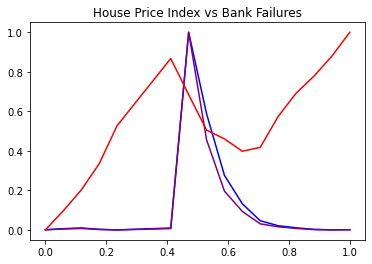

In [57]:
def plot_basic(df, title='House Price Index vs Bank Failures'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df)
    df=pd.DataFrame(scaler.transform(df),columns=['Total Deposits','Total Assets','Loss','Failure Date','HPI'])
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df['Failure Date'], df['Total Deposits'], 'blue')
    ax.plot(df['Failure Date'], df['Total Assets'], 'purple')
    ax.plot(df['Failure Date'], df['HPI'], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(banks)

# Population

In [58]:
data_2=pd.read_csv("C:\\Users\\inasu\\Downloads\\Houses\\API_SP.POP.TOTL_DS2_en_csv_v2_2077948.csv",encoding='latin1')
data_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [59]:
USA_Population=data_2[data_2["Country Code"]=='USA'].drop(["Country Name","Country Code","Indicator Name","Indicator Code","2020"],axis=1).T
USA_Population["Year"]=USA_Population.index.astype(int)
USA_Population["Population"]=USA_Population[249]
USA_Population=USA_Population.drop(249,axis=1).reset_index(drop=True)

In [60]:
USA_Population.head()

,Year,Population
0,1960,180671000.0
1,1961,183691000.0
2,1962,186538000.0
3,1963,189242000.0
4,1964,191889000.0


In [61]:
USA_Population=USA_Population.merge(HPI.groupby(pd.DatetimeIndex(HPI['Date']).year).mean(), left_on='Year', right_on='Date')
USA_Population.head()

,Year,Population,HPI
0,2000,282162411.0,104.767917
1,2001,284968955.0,113.178500
2,2002,287625193.0,122.278250
3,2003,290107933.0,133.730833
4,2004,292805298.0,150.439250


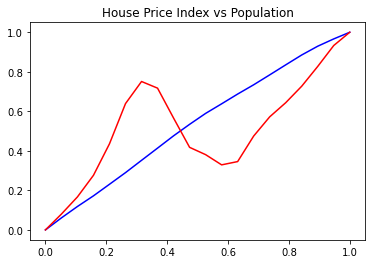

In [62]:
def plot_basic(df, title='House Price Index vs Population'):
    #Fitting both the values on same scale for comparasion
    #Fitting both the values on same scale for comparasion
    scaler.fit(df)
    df=pd.DataFrame(scaler.transform(df))
    
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(df[0], df[1], 'blue')
    ax.plot(df[0], df[2], 'red')

    # Add title and labels
    ax.set_title(title)
    plt.show()
    
plot_basic(USA_Population)

In [63]:
USA_Population.corr()

,Year,Population,HPI
Year,1.000000,0.998119,0.755706
Population,0.998119,1.000000,0.744977
HPI,0.755706,0.744977,1.000000


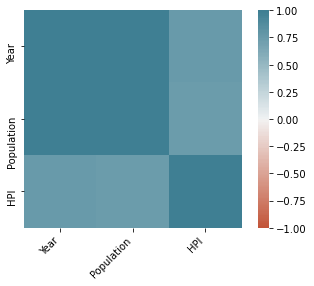

In [64]:
ax = sns.heatmap(
    USA_Population.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can say that population is a good predictor for house prices